In [1]:
#Packages import
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import math
import astropy.units as u
import IPython

C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\config\__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to C:\Users\Nick Landing\.lightkurve\cache. Please move all the files in the legacy directory C:\Users\Nick Landing\.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [29]:
# Search for your target using its TIC ID 
TIC = 'TIC 8174354' 

In [30]:
# Check the availability of the data for this target
available_data_all = lk.search_lightcurve(TIC, author="SPOC");

In [31]:
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 21,2020,SPOC,120,8174354,0.0


In [5]:
# Select multiple sectors based on the available data above.
sector1b = lk.search_lightcurve(TIC, sector=21).download();
sector1 = sector1b.PDCSAP_FLUX.remove_nans();

C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\Nick Landing\AppData\Local\Temp\ipykernel_11700\3424331975.py:3: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  sector1 = sector1b.PDCSAP_FLUX.remove_nans();


In [32]:
sector2b = lk.search_lightcurve(TIC, sector=21, author="SPOC").download();
sector2 = sector2b.PDCSAP_FLUX.remove_nans();

C:\Users\Nick Landing\AppData\Local\Temp\ipykernel_11700\2743846890.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  sector2 = sector2b.PDCSAP_FLUX.remove_nans();


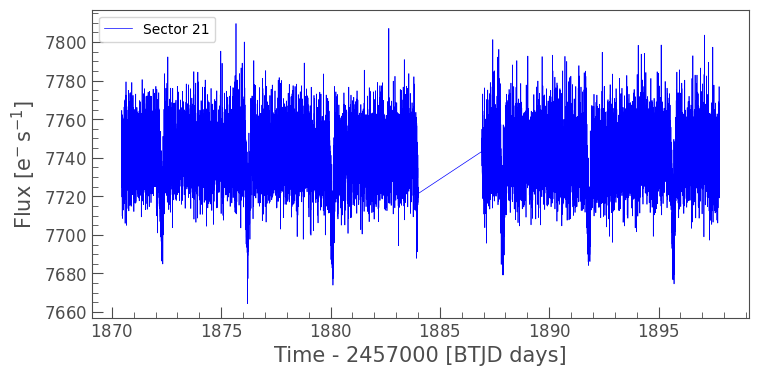

In [33]:
# Plot the light curves with the desired colors and highlighted sectors
ax =sector1.plot(label='Sector 21', color='blue');
%matplotlib inline
ax.legend();

In [34]:
collect_lc = lk.LightCurveCollection([sector2]).stitch();

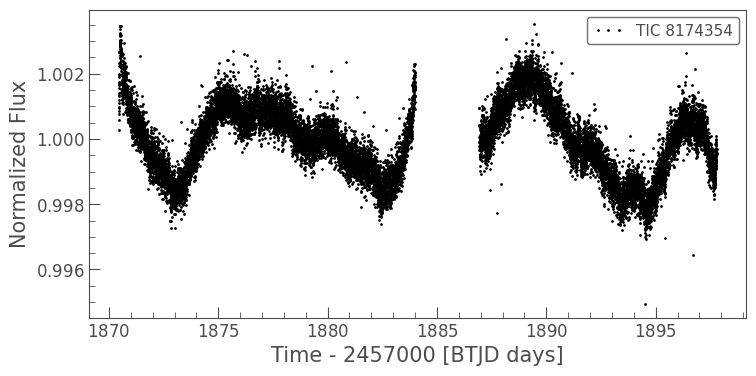

In [35]:
collect_lc.plot(color = 'black', lw = 0, marker = '.');

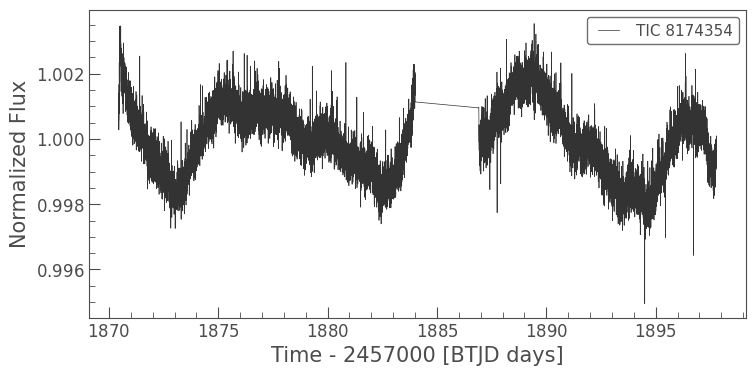

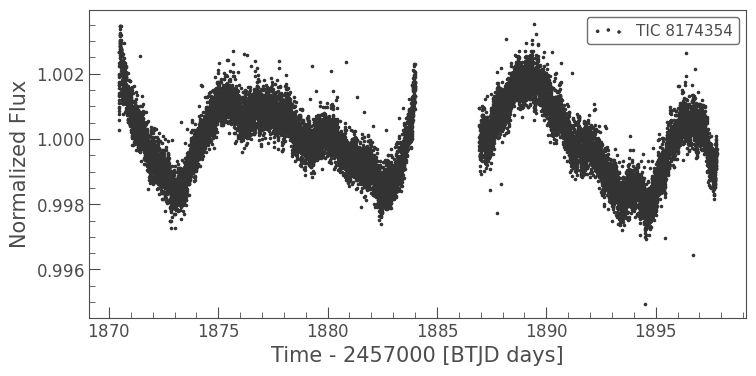

In [37]:
mask = (collect_lc.time.value < 1900)&(collect_lc.time.value > 1870)
masked_lc=collect_lc[mask];
masked_lc.plot();
masked_lc.scatter(s=10);

Period at max power = 21.675508755087552 d
BLS max power = 23.870602990303716
----------------------------------------
Period at second max power = 21.67521275212752 d
BLS max power = 34.892468712696584
----------------------------------------
Period at third max power = 21.67491674916749 d
BLS max power = 46.334069134290175
----------------------------------------
Period at fourth max power = 21.67639676396764 d
BLS max power = 53.174413744848216
----------------------------------------
Period at fifth max power = 21.6769887698877 d
BLS max power = 57.097548261108734
----------------------------------------
Period at sixth max power = 21.67669276692767 d
BLS max power = 72.70752721419262
----------------------------------------
Period at seventh max power = 21.679356793567937 d
BLS max power = 81.9756545821015
----------------------------------------
Period at eighth max power = 21.679060790607906 d
BLS max power = 101.81861425840388
----------------------------------------
Period at 

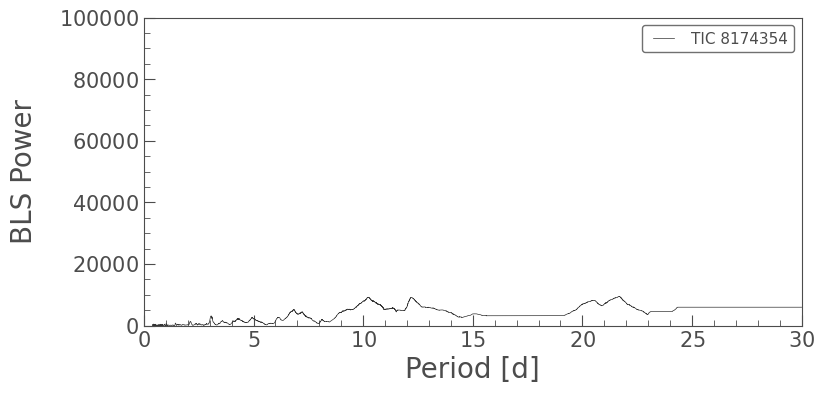

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 100000)
bls = masked_lc.to_periodogram(method='bls', period=period)

# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 30)
plt.ylim([0, 100000])

# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]

# Print the periods and powers of the highest and second highest peaks
#Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
print('Period at max power =', periods[np.argmax(powers)])
print('BLS max power =', np.max(powers[0]))
print('----------------------------------------')
print('Period at second max power =', sorted_periods[1])
print('BLS max power =', np.max(powers[1]))
print('----------------------------------------')
print('Period at third max power =', sorted_periods[2])
print('BLS max power =', np.max(powers[2]))
print('----------------------------------------')
print('Period at fourth max power =', sorted_periods[3])
print('BLS max power =', np.max(powers[3]))
print('----------------------------------------')
print('Period at fifth max power =', sorted_periods[4])
print('BLS max power =', np.max(powers[4]))
print('----------------------------------------')
print('Period at sixth max power =', sorted_periods[5])
print('BLS max power =', np.max(powers[5]))
print('----------------------------------------')
print('Period at seventh max power =', sorted_periods[6])
print('BLS max power =', np.max(powers[6]))
print('----------------------------------------')
print('Period at eighth max power =', sorted_periods[7])
print('BLS max power =', np.max(powers[7]))
print('----------------------------------------')
print('Period at ninth max power =', sorted_periods[8])
print('BLS max power =', np.max(powers[8]))
print('----------------------------------------')


(0.994, 1.003)

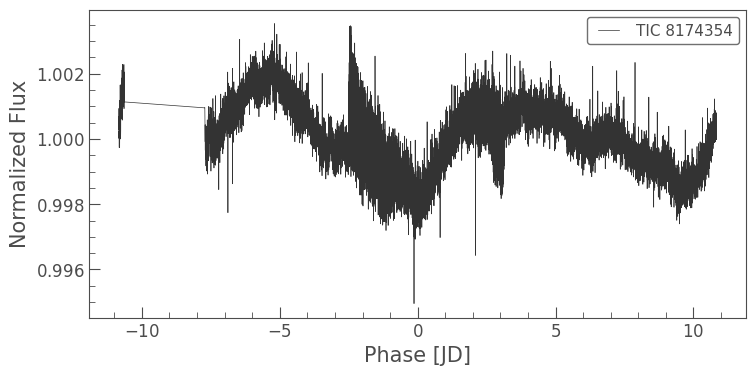

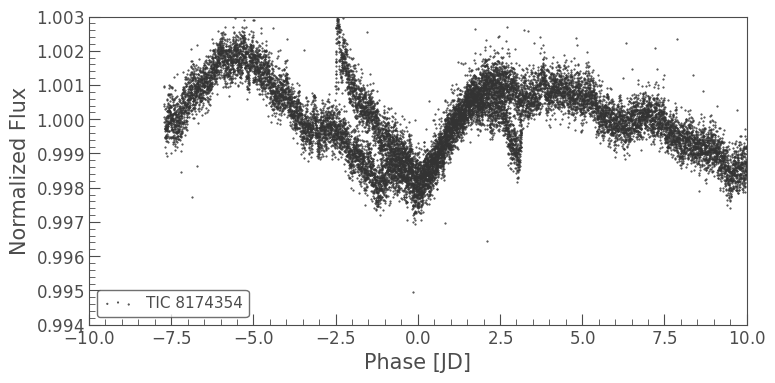

In [48]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
folded_lc = masked_lc.fold(bls.period_at_max_power, epoch_time=bls.transit_time_at_max_power)
folded_lc.plot();
folded_lc.scatter(s=1);
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-10,10)
plt.ylim([0.994,1.003])

(0.994, 1.003)

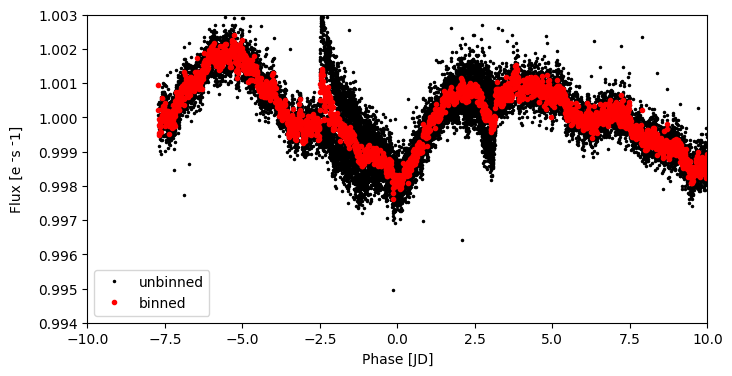

In [49]:
period  =bls.period_at_max_power
t0 = bls.transit_time_at_max_power 

folded2_lc = masked_lc.fold(bls.period_at_max_power, epoch_time=bls.transit_time_at_max_power)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/30)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-10,10)
plt.ylim([0.994,1.003])

In [50]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  0.9976245164871216
median flux = 1.0000616312026978
Tdepth =  0.002437114715576172
Tdepth in ppm =  2437.114715576172 ppm
Rp/Rs ratio =  0.04936714206409129


In [74]:
planet_b_period = bls.period_at_max_power.value
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [75]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 7.92 d hours


In [76]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  0.001889151703286225
depth in ppm = 1889.151703286225 ppm


In [77]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

21.675508755087552 d
1872.9551857757995
0.33 d


In [78]:
P = planet_b_period * 24 * 60 * 60  # planet's period
G = 6.674 * 10 ** -11  # gravitational constant
Msun = 1.98847 * 10 ** 30  # Sun mass
M = 0.98 * Msun  # Star's mass
pi = math.pi
a = ((P ** 2) / ((4 * pi ** 2) / (G * M))) ** (1 / 3)  # Orbital radius or semi-major axis
au = a / 1000 * 0.000000006684587  # Orbital Radius AU
AKM = a / 1000  # Orbital Radius KM

# Print results without the "d(2/3)" notation
print('Orbital Radius')
print('a =', a, 'm')
print('a =', AKM, 'km')
print('a =', au, 'AU')
print('The planetary mass was neglected')


Orbital Radius
a = 22607153840.117355 m
a = 22607153.840117354 km
a = 0.15111948666664854 AU
The planetary mass was neglected


In [79]:
L = 1.333197 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')
if au <= ri and au >= ro:
    print("In the Habitable Zone")
else:
    print("Not in the Habitable Zone")

Habitable Zone
The inner boundary of the habitable zone ri = 1.1009074769149643 AU
The outer boundary of the habitable zone ro = 1.5860220798386915 AU
Not in the Habitable Zone


In [80]:
Rs =1.24392  #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 42761.386631650814 km
Rp= 6.711879866842068 Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 26.09949450198068


In [72]:
P = planet_b_period * 24 * 60 * 60
pi = math.pi
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 75847.75238595736 1 / d(1/3) m/s


In [25]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('Error = '(a1 + a2)/2)
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  3.9004390043900434 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  4.800000000000001 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  0.006253182888031006
Transit depth in ppm =  6253.182888031006 ppm
Transit Depth from bls model in ppm = 4040.3346148762 ppm
Rp/Rs ratio =  0.07907706929338622
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 22185.93821556617 km
Rp= 3.48233216379943 Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 9863919468.920214 m
a = 9863919.468920214 km
a = 0.06593622785099097 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 25.557500387634732
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 185018.0739547936 m/s
- - - - - - - - - - - - - - - - - - - - 


In [26]:
import cmath
#Calculation of total transit duration Tt
Tt = ((((4 * period **(2) * Tdepth ** (1/2))/(math.pi ** 2)) * (((Rs*Rsun)/(a/1000))**(2))) + (planet_b_dur ** (2))) ** (1/2)
print('Total transit duration T14 Tt =', Tt)
print('Tt in hours =', Tt * 24, 'hours')
#Calculation of the impact parameter b for eccentricity e=0
#b = (( ((1-(Tdepth **(1/2)))**(2)-(planet_b_dur/Tt)**(2))* (1+(Tdepth **(1/2)))**(2)  ) / (1 - (planet_b_dur/Tt)**(2) ) ) ** (1/2)
b = abs(( ((1-cmath.sqrt(Tdepth))**(2)-(planet_b_dur/Tt)**(2)) * (1+cmath.sqrt(Tdepth))**(2)  ) / cmath.sqrt(1 - (planet_b_dur/Tt)**(2) ))
print('Impart parameter b =', b)
#Calculation of inclination
i = cmath.acos(b*(Rs*Rsun)/(a/1000))
print('Inclination i =', 90-i, 'deg')

Total transit duration T14 Tt = 0.20098370866367576 d
Tt in hours = 4.823609007928218 d hours
Impart parameter b = 1.6748394250696366
Inclination i = (88.47685942107101+0j) deg


In [27]:
lk.show_citation_instructions()